In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
sns.set_style('whitegrid')

In [3]:
test_data['Survived'] = 0

In [4]:
combined_train_test = train_data.append(test_data)
PId = test_data['PassengerId']

In [5]:
combined_train_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 132.9+ KB


In [6]:
#通过众数填补Embarked的缺失值
combined_train_test['Embarked'].fillna(combined_train_test['Embarked'].mode().iloc[0], inplace=True)
#通过中位数填补年龄，fare的缺失值
combined_train_test["Age"] = combined_train_test["Age"].fillna(combined_train_test["Age"].median())
combined_train_test["Fare"] = combined_train_test["Fare"].fillna(combined_train_test["Fare"].median())

In [7]:
#删除影响较小的特征
combined_train_test.drop(['PassengerId'], axis=1,inplace=True)
combined_train_test.drop(['Name'], axis=1,inplace=True)
combined_train_test.drop(['Cabin'], axis=1,inplace=True)
combined_train_test.drop(['Ticket'], axis=1,inplace=True)

In [8]:
combined_train_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1309 non-null   int64  
 1   Pclass    1309 non-null   int64  
 2   Sex       1309 non-null   object 
 3   Age       1309 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Fare      1309 non-null   float64
 7   Embarked  1309 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 92.0+ KB


In [9]:
# 为了后面的特征分析，这里我们将 Embarked 特征进行facrorizing
combined_train_test['Embarked'] = pd.factorize(combined_train_test['Embarked'])[0]

# 使用 pd.get_dummies 获取one-hot 编码
emb_dummies_df = pd.get_dummies(combined_train_test['Embarked'], prefix=combined_train_test[['Embarked']].columns[0])
combined_train_test = pd.concat([combined_train_test, emb_dummies_df], axis=1)

combined_train_test['Sex'] = pd.factorize(combined_train_test['Sex'])[0]

# 使用 pd.get_dummies 获取one-hot 编码
emb_dummies_df = pd.get_dummies(combined_train_test['Sex'], prefix=combined_train_test[['Sex']].columns[0])
combined_train_test = pd.concat([combined_train_test, emb_dummies_df], axis=1)


In [10]:
combined_train_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    1309 non-null   int64  
 1   Pclass      1309 non-null   int64  
 2   Sex         1309 non-null   int64  
 3   Age         1309 non-null   float64
 4   SibSp       1309 non-null   int64  
 5   Parch       1309 non-null   int64  
 6   Fare        1309 non-null   float64
 7   Embarked    1309 non-null   int64  
 8   Embarked_0  1309 non-null   uint8  
 9   Embarked_1  1309 non-null   uint8  
 10  Embarked_2  1309 non-null   uint8  
 11  Sex_0       1309 non-null   uint8  
 12  Sex_1       1309 non-null   uint8  
dtypes: float64(2), int64(6), uint8(5)
memory usage: 98.4 KB


In [11]:
combined_train_test_corr = combined_train_test.corr()
combined_train_test_corr

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Embarked_0,Embarked_1,Embarked_2,Sex_0,Sex_1
Survived,1.000000,-0.244686,0.404020,-0.055862,-0.014375,0.054908,0.173786,0.048409,-0.077095,0.096513,-0.012730,-0.404020,0.404020
Pclass,-0.244686,1.000000,-0.124617,-0.377908,0.060832,0.018322,-0.558683,0.038875,0.091320,-0.269658,0.230491,0.124617,-0.124617
Sex,0.404020,-0.124617,1.000000,-0.053663,0.109609,0.213125,0.185681,0.120423,-0.115193,0.066564,0.088651,-1.000000,1.000000
Age,-0.055862,-0.377908,-0.053663,1.000000,-0.189972,-0.125851,0.178182,0.018654,-0.046404,0.075016,-0.031132,0.053663,-0.053663
SibSp,-0.014375,0.060832,0.109609,-0.189972,1.000000,0.373587,0.160349,-0.073461,0.073709,-0.048396,-0.048678,-0.109609,0.109609
Parch,0.054908,0.018322,0.213125,-0.125851,0.373587,1.000000,0.221635,-0.095523,0.071881,-0.008635,-0.100943,-0.213125,0.213125
Fare,0.173786,-0.558683,0.185681,0.178182,0.160349,0.221635,1.000000,0.061283,-0.170068,0.286368,-0.129958,-0.185681,0.185681
Embarked,0.048409,0.038875,0.120423,0.018654,-0.073461,-0.095523,0.061283,1.000000,-0.921261,0.472747,0.791634,-0.120423,0.120423
Embarked_0,-0.077095,0.091320,-0.115193,-0.046404,0.073709,0.071881,-0.170068,-0.921261,1.000000,-0.778262,-0.491656,0.115193,-0.115193
Embarked_1,0.096513,-0.269658,0.066564,0.075016,-0.048396,-0.008635,0.286368,0.472747,-0.778262,1.000000,-0.164166,-0.066564,0.066564


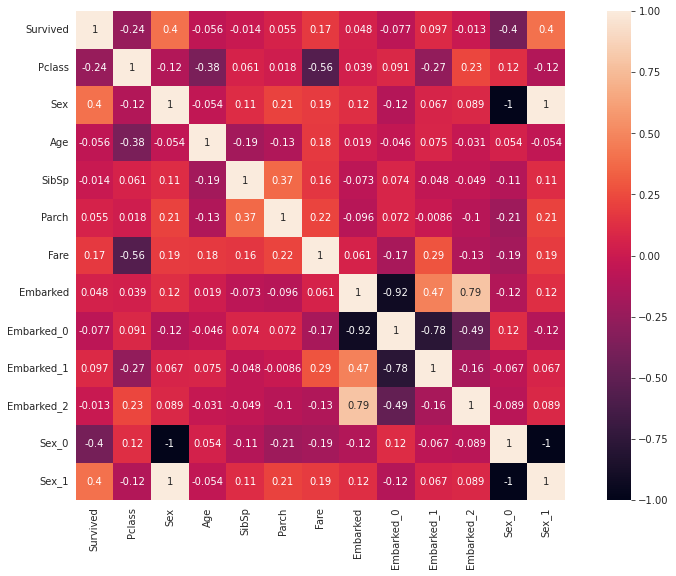

In [12]:
# 画出相关性热力图
a = plt.subplots(figsize=(15,9))#调整画布大小
a = sns.heatmap(combined_train_test_corr, vmin=-1, vmax=1 , annot=True , square=True)#画热力图

In [13]:
train_data = combined_train_test[:891]
test_data = combined_train_test[891:]

titanic_train_data_X = train_data.drop(['Survived'],axis=1)
titanic_train_data_Y = train_data['Survived']
titanic_test_data_X = test_data.drop(['Survived'],axis=1)

In [14]:
titanic_train_data_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      891 non-null    int64  
 1   Sex         891 non-null    int64  
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Embarked    891 non-null    int64  
 7   Embarked_0  891 non-null    uint8  
 8   Embarked_1  891 non-null    uint8  
 9   Embarked_2  891 non-null    uint8  
 10  Sex_0       891 non-null    uint8  
 11  Sex_1       891 non-null    uint8  
dtypes: float64(2), int64(5), uint8(5)
memory usage: 60.0 KB


In [15]:
features = ["Pclass", "Age", "SibSp","Parch","Fare","Embarked_0","Embarked_1","Embarked_2", "Sex_0", "Sex_1"]

In [16]:
from sklearn.ensemble import RandomForestClassifier
train_data_X = pd.get_dummies(train_data[features])
test_data_X = pd.get_dummies(test_data[features])
train_data_Y = train_data['Survived']

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(train_data_X, train_data_Y)
predictions = model.predict(test_data_X)
output = pd.DataFrame({'PassengerId': PId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [17]:
# from sklearn.ensemble import RandomForestClassifier

# y = train_data["Survived"]

# features = ["Pclass", "Sex", "SibSp", "Parch"]
# X = pd.get_dummies(train_data[features])
# X_test = pd.get_dummies(test_data[features])

# model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
# model.fit(X, y)
# predictions = model.predict(X_test)

# output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
# output.to_csv('submission.csv', index=False)
# print("Your submission was successfully saved!")

In [18]:
#train_data.head()

In [19]:
#train_data.info()

In [20]:
#test_data.info()

In [21]:
# 缺失值处理
# train_data.Embarked[train_data.Embarked.isnull()] = train_data.Embarked.dropna().mode().values
# train_data['Cabin'] = train_data.Cabin.fillna('NULL')

# from sklearn.ensemble import RandomForestRegressor

# #choose training data to predict age
# age_df = train_data[['Age','Survived','Fare', 'Parch', 'SibSp', 'Pclass']]
# age_df_notnull = age_df.loc[(train_data['Age'].notnull())]
# age_df_isnull = age_df.loc[(train_data['Age'].isnull())]
# X = age_df_notnull.values[:,1:]
# Y = age_df_notnull.values[:,0]
# # use RandomForestRegression to train data
# RFR = RandomForestRegressor(n_estimators=1000, n_jobs=-1)
# RFR.fit(X,Y)
# predictAges = RFR.predict(age_df_isnull.values[:,1:])
# train_data.loc[train_data['Age'].isnull(), ['Age']]= predictAges


In [22]:
#train_data.info()

In [23]:
# # 变量转换
# train_data = train_data.join(pd.get_dummies(train_data['Embarked']))
# train_data.drop(['Embarked'], axis=1,inplace=True)

In [24]:
# train_data = train_data.join(pd.get_dummies(train_data['Sex']))
# train_data.drop(['Sex'], axis=1,inplace=True)

In [25]:
# train_data

In [26]:
# train_corr  = train_data.corr()
# train_corr
# a = plt.subplots(figsize=(15,9))#调整画布大小
# a = sns.heatmap(train_corr , vmin=-1, vmax=1 , annot=True , square=True)#画热力图